In [1]:
import numpy as np
from scipy import stats

def multiple_regression(X, y, alpha=0.05):
    """
    X: матриця факторів розмірності (n × p)
    y: вектор відгуку розмірності (n,)
    alpha: рівень значущості для тестів (за замовчуванням 0.05)
    """
    n, p = X.shape
    # Додаємо стовпець одиниць для вільного члена
    X_design = np.hstack([np.ones((n, 1)), X])
    p1 = p + 1  # кількість оцінюваних параметрів разом із вільним членом

    # 1) Оцінка параметрів θ̂ = (XᵀX)⁻¹ Xᵀ y
    XtX = X_design.T @ X_design
    XtX_inv = np.linalg.inv(XtX)
    theta_hat = XtX_inv @ X_design.T @ y

    # Передбачене значення та залишки
    y_pred = X_design @ theta_hat
    residuals = y - y_pred

    # 2) Оцінка дисперсії залишків s² = SSE / (n – p₁)
    SSE = residuals.T @ residuals
    s2 = SSE / (n - p1)
    s = np.sqrt(s2)  # стандартна помилка рівняння

    # 3) Коефіцієнт детермінації R²
    y_mean = np.mean(y)
    Syy = ((y - y_mean) ** 2).sum()
    R2 = 1 - SSE / Syy

    # 4) F-тест адекватності моделі
    F_stat = (R2 / p) / ((1 - R2) / (n - p1))
    F_crit = stats.f.ppf(1 - alpha, p, n - p1)

    # 5) t-тест значущості множинного кореляційного коефіцієнта R
    R = np.sqrt(R2)
    t_R = R * np.sqrt((n - p1) / (1 - R2))
    t_crit_R = stats.t.ppf(1 - alpha/2, df=n - p1)
    sig_R = "значущий" if abs(t_R) > t_crit_R else "ненадійний"

    # 6) t-тести для кожного коефіцієнта θ̂ᵢ та їх довірчі інтервали
    se_theta = np.sqrt(np.diag(XtX_inv) * s2)
    t_stats = theta_hat / se_theta
    t_crit = stats.t.ppf(1 - alpha / 2, df=n - p1)
    CI_lower = theta_hat - t_crit * se_theta
    CI_upper = theta_hat + t_crit * se_theta

    # 7) Дисперсії оцінок θ̂ᵢ
    var_theta = np.diag(XtX_inv) * s2

    # Вивід результатів
    print(f"\n=== Результати (n={n}, p={p}) ===")
    print(f"θ̂ = {theta_hat}")
    print(f"Стандартна помилка рівняння s = {s:.4f}")
    print(f"SSE = {SSE:.4f}, Syy = {Syy:.4f}")
    print(f"R² = {R2:.4f}")
    print(f"F-статистика = {F_stat:.4f}, F_crit(α={alpha}) = {F_crit:.4f}")
    print("Модель адекватна даним" if F_stat > F_crit else "Модель неадекватна даним")
    print(f"\nt-тест множинного R: t_R = {t_R:.4f}, критичне ±{t_crit_R:.4f} → {sig_R}")
    print("\nКоефіцієнти та їх t-статистики, довірчі інтервали та дисперсії:")
    for i, (coef, t_val, se, lo, hi, var) in enumerate(zip(
            theta_hat, t_stats, se_theta, CI_lower, CI_upper, var_theta)):
        name = "Intercept" if i == 0 else f"x{i}"
        sig = "значущий" if abs(t_val) > t_crit else "ненадійний"
        print(f" {name:>9}: θ̂={coef:.4f}, SE={se:.4f}, Var={var:.6f}, t={t_val:.4f} ({sig}), CI=[{lo:.4f}, {hi:.4f}]")
    print("="*50)


if __name__ == "__main__":
    # Приклад даних №1
    X1 = np.array([
        [1.59, 0.26, 2.05, 0.32, 0.14],
        [0.34, 0.28, 0.46, 0.59, 0.66],
        [2.53, 0.31, 2.46, 0.30, 0.31],
        [4.63, 0.40, 6.44, 0.43, 0.59],
        [2.16, 0.26, 2.16, 0.39, 0.16],
        [2.16, 0.30, 2.69, 0.32, 0.17],
        [0.68, 0.29, 0.73, 0.42, 0.23],
        [0.35, 0.26, 0.42, 0.21, 0.08],
        [0.52, 0.24, 0.49, 0.20, 0.08],
        [3.42, 0.31, 3.02, 1.37, 0.73],
        [1.78, 0.30, 3.19, 0.73, 0.17],
        [2.40, 0.32, 3.30, 0.25, 0.14],
        [9.36, 0.40,11.51, 0.39, 0.38],
        [1.72, 0.28, 2.26, 0.82, 0.17],
        [0.59, 0.29, 0.60, 0.13, 0.35],
        [0.28, 0.26, 0.30, 0.09, 0.15],
        [1.64, 0.29, 1.44, 0.20, 0.08],
        [0.09, 0.22, 0.05, 0.43, 0.20],
        [0.08, 0.25, 0.03, 0.73, 0.20],
        [1.36, 0.26, 0.17, 0.99, 0.42],
    ])
    y1 = np.array([9.7, 8.4, 9.0, 9.9, 9.6, 8.6,12.5, 7.6, 6.9,13.5,
                   9.7,10.7,12.1, 9.7, 7.0, 7.2, 8.2, 8.4,13.1, 8.7])

    # Приклад даних №2
    X2 = np.array([
        [29.2, 31.5,  7.0, 1.875],
        [28.58,36.2,  3.0, 1.785],
        [29.36,33.1,  7.2, 1.826],
        [29.29,35.3,  5.6, 1.840],
        [29.25,35.6,  5.8, 1.800],
        [25.90,39.6,  1.7, 2.110],
        [25.76,40.3,  6.0, 1.970],
        [25.23,41.4,  1.2, 2.060],
        [25.61,36.1,  5.4, 2.060],
        [26.64,40.7, 13.6, 2.020],
        [27.81,33.5, 14.0, 1.940],
        [26.36,35.1,  5.8, 1.900],
        [26.54,37.0,  7.4, 2.000],
        [26.64,35.2,  6.9, 1.910],
        [27.25,35.2,  7.1, 1.860],
        [27.42,37.6,  6.9, 1.840],
        [26.64,35.0,  8.2, 1.950],
        [26.55,33.4,  3.5, 1.970],
        [27.97,36.0,  6.9, 1.950],
        [28.50,34.1,  5.4, 1.990],
        [27.34,35.5,  7.0, 2.010],
        [24.40,39.5,  0.6, 1.840],
        [23.68,38.5,  8.1, 1.990],
        [24.41,37.8,  9.8, 2.060],
        [23.76,39.9,  7.6, 2.090],
        [24.70,42.3,  6.8, 2.240],
        [23.98,37.2, 12.0, 2.110],
        [25.98,40.4,  7.2, 2.150],
        [27.83,35.3,  1.3, 1.827],
    ])
    y2 = np.array([
        83.03, 82.91, 79.67, 84.58, 84.87, 68.40, 70.61, 68.96, 62.25, 69.05,
        68.29, 70.61, 68.45, 68.67, 74.88, 75.05, 69.79, 71.10, 78.00, 77.63,
        75.45, 73.16, 55.75, 59.95, 56.50, 57.99, 56.97, 61.52, 81.87
    ])

    # Виконуємо аналіз
    multiple_regression(X1, y1)
    multiple_regression(X2, y2)



=== Результати (n=20, p=5) ===
θ̂ = [ 3.51459511e+00 -6.13061938e-03  1.55424554e+01  1.09899373e-01
  4.47457527e+00 -2.93251090e+00]
Стандартна помилка рівняння s = 1.5990
SSE = 35.7955, Syy = 74.1575
R² = 0.5173
F-статистика = 3.0008, F_crit(α=0.05) = 2.9582
Модель адекватна даним

t-тест множинного R: t_R = 3.8735, критичне ±2.1448 → значущий

Коефіцієнти та їх t-статистики, довірчі інтервали та дисперсії:
 Intercept: θ̂=3.5146, SE=5.4185, Var=29.360474, t=0.6486 (ненадійний), CI=[-8.1070, 15.1362]
        x1: θ̂=-0.0061, SE=0.9317, Var=0.868010, t=-0.0066 (ненадійний), CI=[-2.0044, 1.9921]
        x2: θ̂=15.5425, SE=21.5031, Var=462.383815, t=0.7228 (ненадійний), CI=[-30.5771, 61.6620]
        x3: θ̂=0.1099, SE=0.8325, Var=0.693130, t=0.1320 (ненадійний), CI=[-1.6757, 1.8955]
        x4: θ̂=4.4746, SE=1.5435, Var=2.382251, t=2.8991 (значущий), CI=[1.1642, 7.7850]
        x5: θ̂=-2.9325, SE=3.0883, Var=9.537773, t=-0.9495 (ненадійний), CI=[-9.5563, 3.6913]

=== Результати (n=29, p

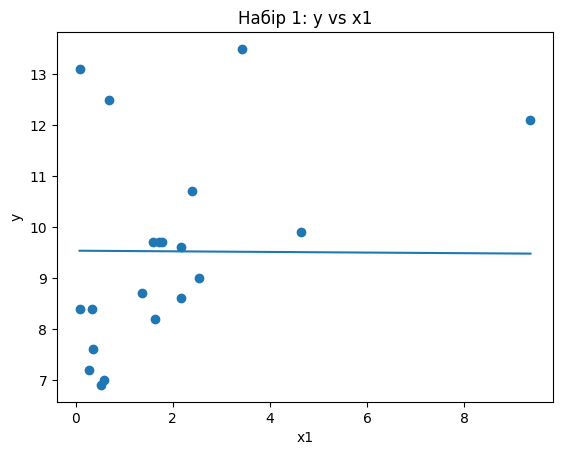

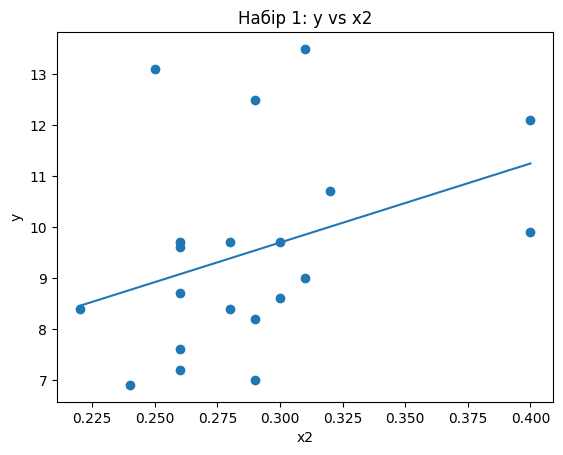

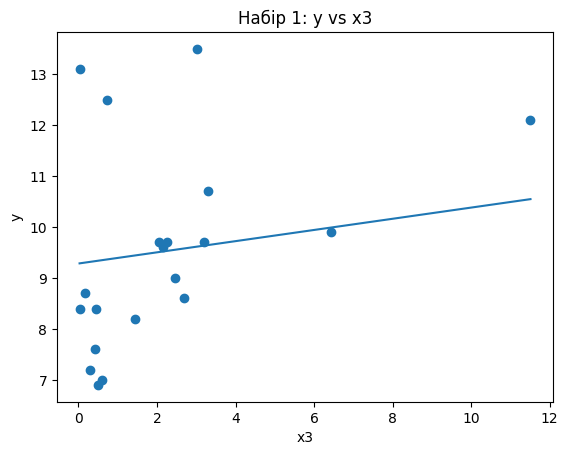

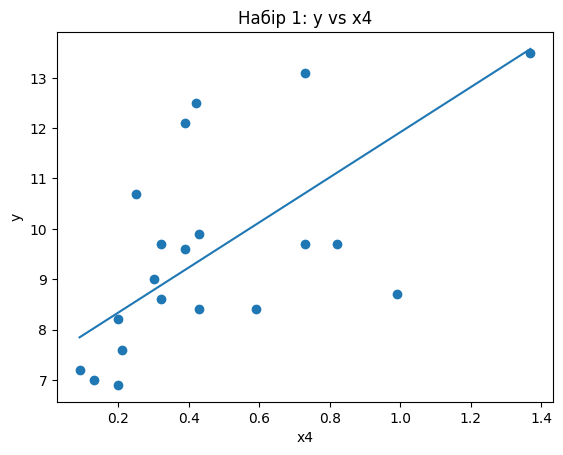

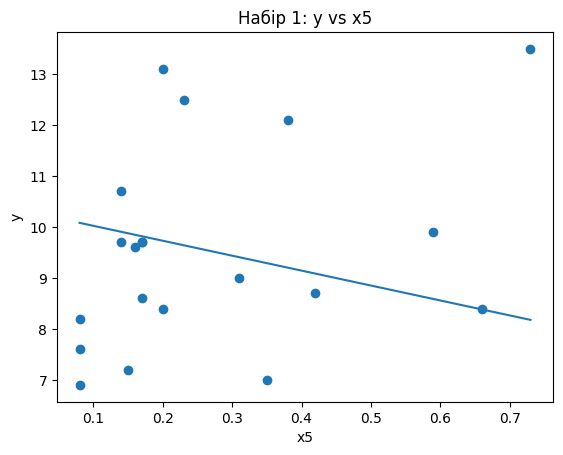

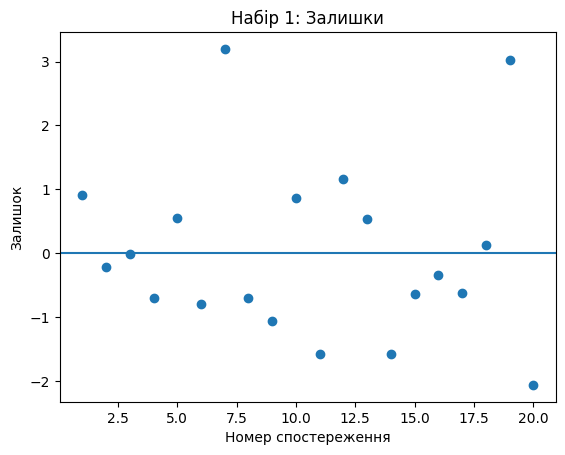

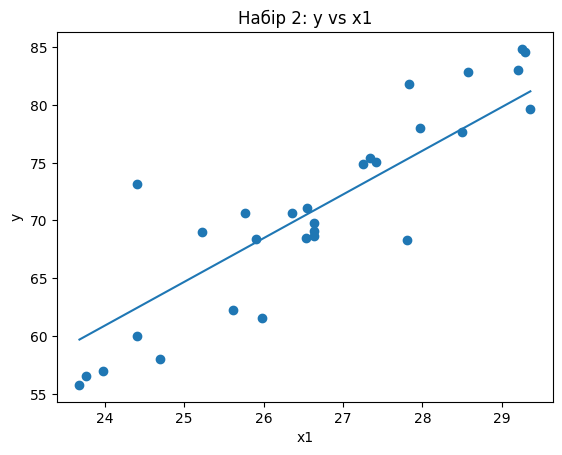

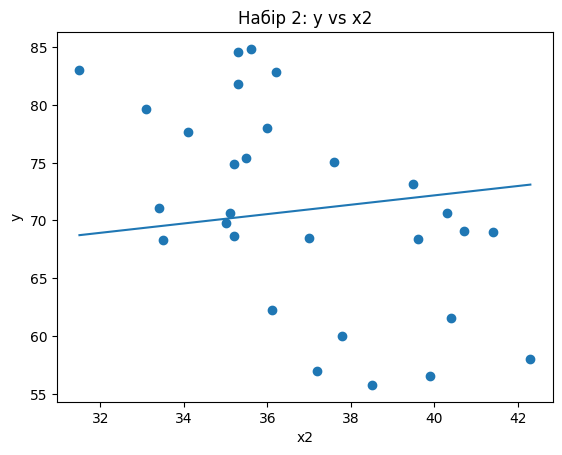

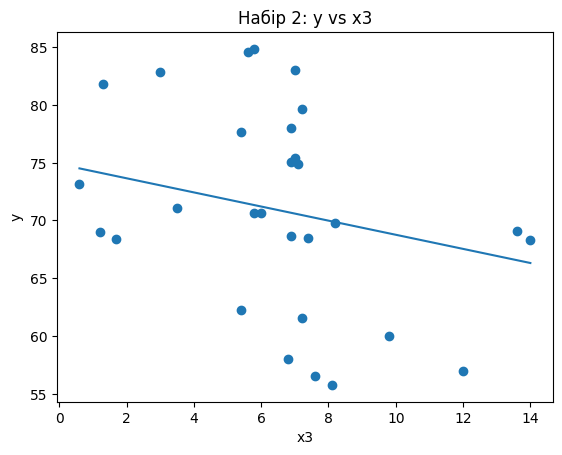

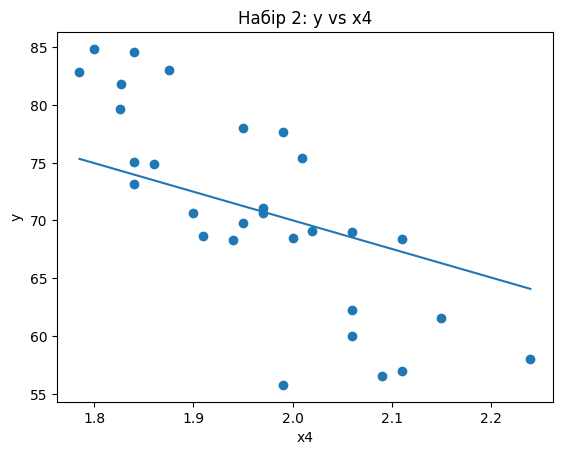

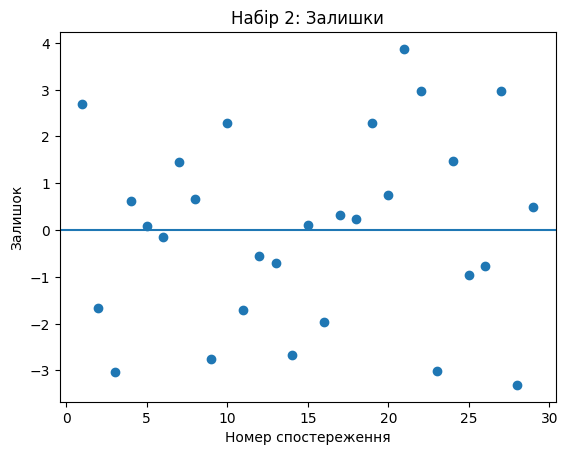

In [2]:
import numpy as np
import matplotlib.pyplot as plt

theta1 = np.array([ 3.51459511e+00,
                   -6.13061938e-03,
                    1.55424554e+01,
                    1.09899373e-01,
                    4.47457527e+00,
                   -2.93251090e+00])

theta2 = np.array([  7.68443028,
                     3.78763253,
                     0.40567682,
                    -0.61193488,
                   -24.76377360])

def plot_scatter_with_regression(X, y, theta, title_prefix):
    """
    Для кожної колонки X[:, j] будує:
     - розсіювання y vs X[:, j]
     - лінію регресії, де інші змінні фіксовані на їхніх середніх
    """
    n, p = X.shape
    means = X.mean(axis=0)
    for j in range(p):
        plt.figure()
        plt.scatter(X[:, j], y)
        # лінія регресії при інших х на середніх
        x_vals = np.linspace(X[:, j].min(), X[:, j].max(), 100)
        X_line = np.tile(means, (100, 1))
        X_line[:, j] = x_vals
        X_line_design = np.hstack([np.ones((100, 1)), X_line])
        y_line = X_line_design @ theta
        plt.plot(x_vals, y_line)
        plt.title(f"{title_prefix}: y vs x{j+1}")
        plt.xlabel(f"x{j+1}")
        plt.ylabel("y")
        plt.show()

def plot_residuals(X, y, theta, title):
    """
    Будує графік залишків e_i = y_i - ŷ_i
    """
    X_design = np.hstack([np.ones((len(y), 1)), X])
    y_pred = X_design @ theta
    residuals = y - y_pred
    plt.figure()
    plt.scatter(np.arange(1, len(residuals)+1), residuals)
    plt.axhline(0)
    plt.title(f"{title}: Залишки")
    plt.xlabel("Номер спостереження")
    plt.ylabel("Залишок")
    plt.show()

# === Побудова графіків для набору №1 ===
plot_scatter_with_regression(X1, y1, theta1, "Набір 1")
plot_residuals(X1, y1, theta1, "Набір 1")

# === Побудова графіків для набору №2 ===
plot_scatter_with_regression(X2, y2, theta2, "Набір 2")
plot_residuals(X2, y2, theta2, "Набір 2")
